# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [64]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

desired_width = 420
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 200)

%matplotlib inline

Прочитаем исходные данные:

In [65]:
data = pd.read_csv(
    "D:/prog/proj/python/mifi_ml/mifi_ml/python_for_data_analysis/data/unconv.csv",
    sep=",",
)
data = data[["Prod", "Well", "Por", "Perm", "AI", "Brittle", "TOC", "VR"]]

data.head()

,Prod,Well,Por,Perm,AI,Brittle,TOC,VR
0,4165.196191,1,12.08,2.92,2.80,81.40,1.16,2.31
1,3561.146205,2,12.38,3.53,3.22,46.17,0.89,1.88
2,4284.348574,3,14.02,2.59,4.01,72.80,0.89,2.72
3,5098.680869,4,17.67,6.75,2.63,39.81,1.08,1.88
4,3406.132832,5,17.52,4.57,3.18,10.94,1.51,1.90


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

,Prod,Well,Por,Perm,AI,Brittle,TOC,VR
0,4165.196191,1,12.08,2.92,2.80,81.40,1.16,2.31
1,3561.146205,2,12.38,3.53,3.22,46.17,0.89,1.88
2,4284.348574,3,14.02,2.59,4.01,72.80,0.89,2.72
3,5098.680869,4,17.67,6.75,2.63,39.81,1.08,1.88
4,3406.132832,5,17.52,4.57,3.18,10.94,1.51,1.90


,Prod,Well,Por,Perm,AI,Brittle,TOC,VR
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4311.219852,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300
std,992.038414,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827
min,2107.139414,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000
25%,3618.064513,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000
50%,4284.687348,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000
75%,5086.089761,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500
max,6662.622385,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000


Prod   Well   Por    Perm   AI     Brittle  TOC    VR   
False  False  False  False  False  False    False  False    200
Name: count, dtype: int64

(200, 8)

Prod       200
Well       200
Por        188
Perm       110
AI         128
Brittle    195
TOC        120
VR          95
dtype: int64

<Axes: title={'center': 'Распределение скважин по размеру добычи'}, xlabel='Добыча', ylabel='Количество попаданий'>

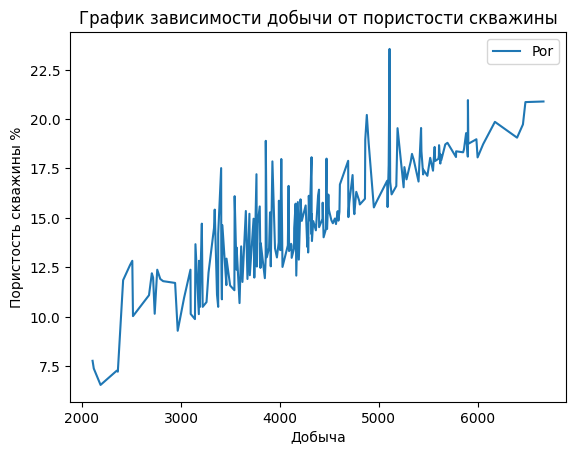

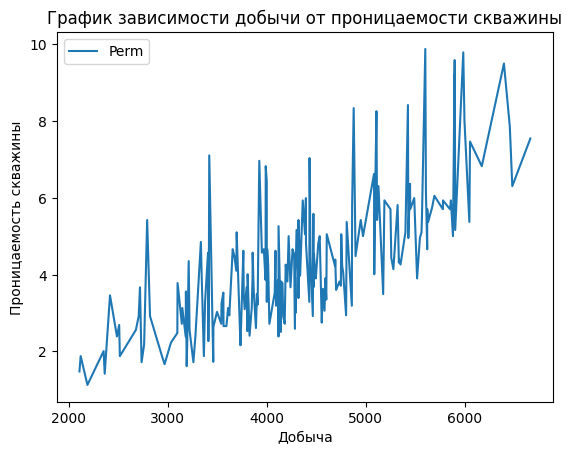

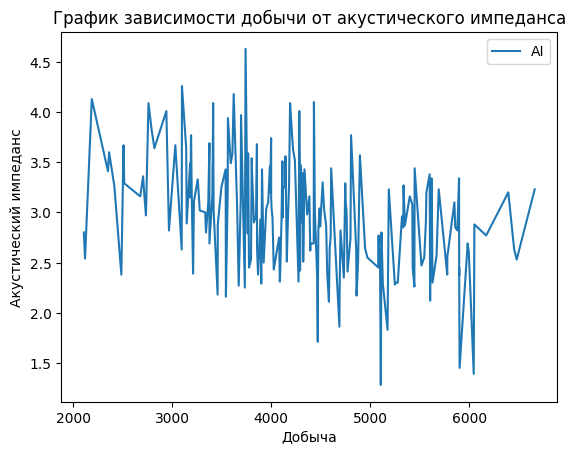

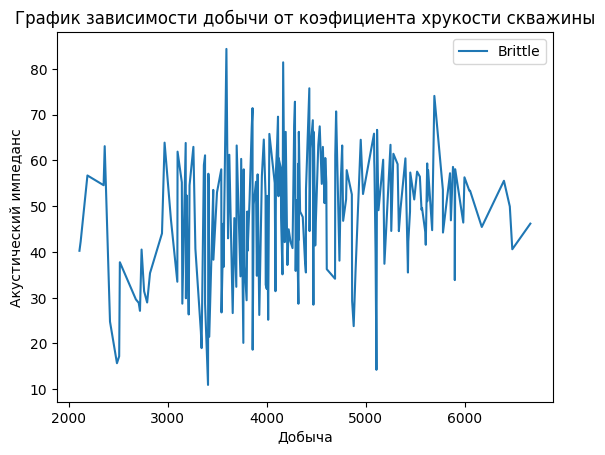

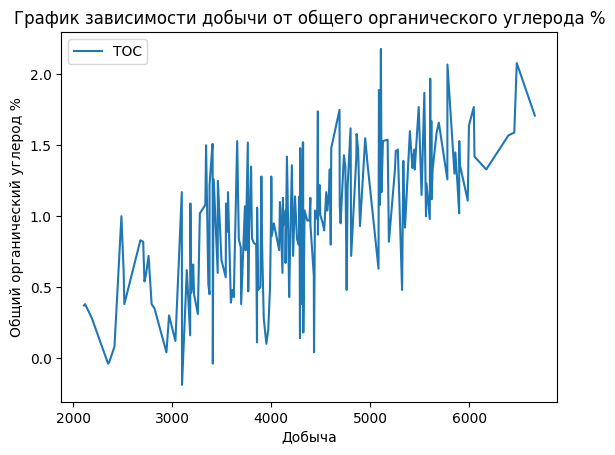

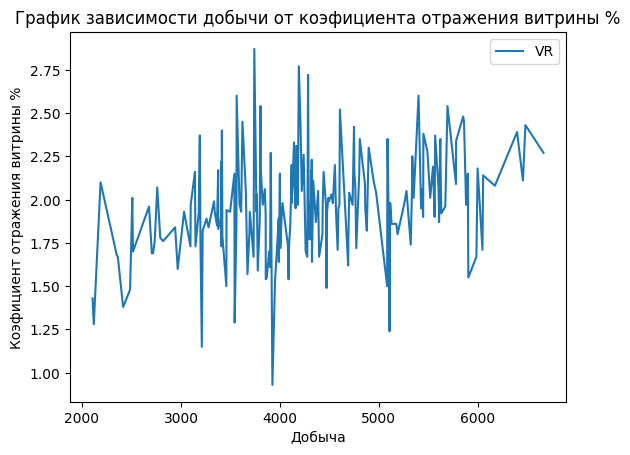

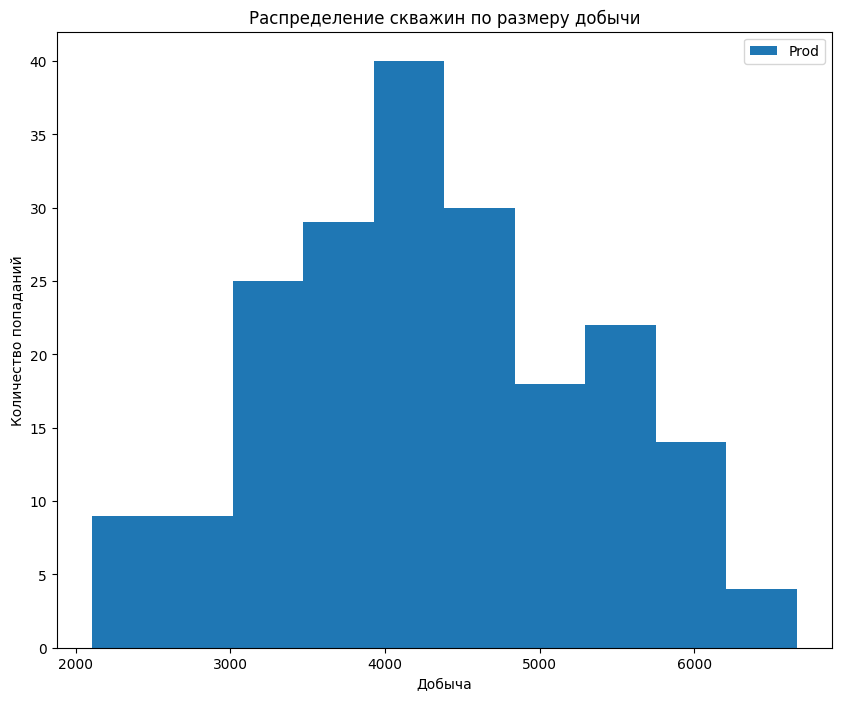

In [66]:
# Ваш код здесь
display(data.head())
display(data.describe())
display(data.isna().value_counts())
display(data.shape)
display(data.nunique())
data_cp = data.copy()
data_cp = data_cp.sort_values(by=["Prod"])
data_cp.plot.line(
    x="Prod",
    y="Por",
    title="График зависимости добычи от пористости скважины",
    xlabel="Добыча",
    ylabel="Пористость скважины %",
)
data_cp.plot.line(
    x="Prod",
    y="Perm",
    title="График зависимости добычи от проницаемости скважины",
    xlabel="Добыча",
    ylabel="Проницаемость скважины",
)
data_cp.plot.line(
    x="Prod",
    y="AI",
    title="График зависимости добычи от акустического импеданса",
    xlabel="Добыча",
    ylabel="Акустический импеданс",
)
data_cp.plot.line(
    x="Prod",
    y="Brittle",
    title="График зависимости добычи от коэфициента хрукости скважины",
    xlabel="Добыча",
    ylabel="Акустический импеданс",
)
data_cp.plot.line(
    x="Prod",
    y="TOC",
    title="График зависимости добычи от общего органического углерода %",
    xlabel="Добыча",
    ylabel="Общий органический углерод %",
)
data_cp.plot.line(
    x="Prod",
    y="VR",
    title="График зависимости добычи от коэфициента отражения витрины %",
    xlabel="Добыча",
    ylabel="Коэфициент отражения витрины %",
)
data_cp.plot.hist(
    column=["Prod"],
    figsize=(10, 8),
    title="Распределение скважин по размеру добычи",
    xlabel="Добыча",
    ylabel="Количество попаданий",
)

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

,Prod,Well,Por,Perm,AI,Brittle,TOC,VR
Prod,1.000000,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182
Well,0.026817,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279
Por,0.861910,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860
Perm,0.727426,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023
AI,-0.390835,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143
Brittle,0.237155,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929
TOC,0.654445,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483
VR,0.323182,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000


'Ранг корелляционной матрицы: 8'

'Определитель корелляционной матрицы: 0.0007299388072651992'

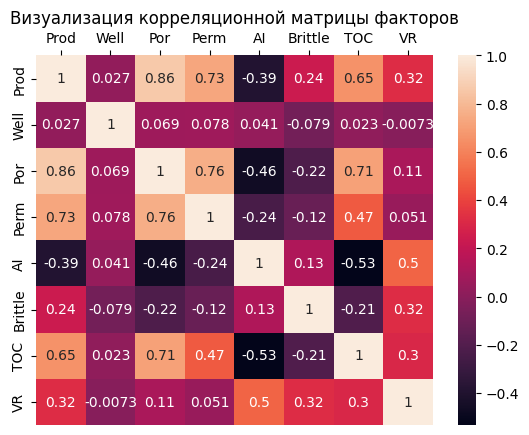

In [67]:
# Ваш код здесь
corr_mx = data.corr()
display(corr_mx)
display(f"Ранг корелляционной матрицы: {np.linalg.matrix_rank(corr_mx)}")
display(f"Определитель корелляционной матрицы: {np.linalg.det(corr_mx)}")
ax = sns.heatmap(corr_mx, annot=True )
ax.set_title("Визуализация корреляционной матрицы факторов")
ax.xaxis.tick_top()

> *Ваши выводы здесь*
<br>
Выводы:
<br>
С целевой переменной, то-есть Prod сильнее всего кореллируют пористость, проницаемость и общий органический углерод % скважины. 
Ранг матрицы максимальный: 7
Определитель матрицы: 0.0007477684988022799
Корреляционная матрица является плохо обусловенной, так как её опредитель близок к нулю. Матрица почти вырождена видимо присутствуют мультиколлинеарные регрессоры.
По поводу наличия коллинеарности или мультиколлинеарности в данных: присутствует довольно высокая корелляция между факторами пористость, проницаемость и общий органический углерод % скважины. Видимо факторы кореллируют, что негативно влияет на качество построенной матрицы.
Модель классической линейной регрессии по методу наименьших квадратов в данном случае применима, так как у матрицы максимальный ранг и наблюдается средняя и высокая корелляция целевого фактора с некоторыми регрессорами.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [68]:
# Ваш код здесь
data_no_prod: pd.DataFrame = data.drop("Prod", axis=1)
X = data_no_prod.to_numpy()
y = data["Prod"]
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
w_hat_rounded: pd.DataFrame = np.around(w_hat)
idx_list = data_no_prod.columns.values.tolist()
w_hat_rounded_df: pd.DataFrame = pd.DataFrame(w_hat_rounded, index=idx_list)
display(w_hat_rounded_df)

,0
Well,-0.0
Por,185.0
Perm,158.0
AI,-676.0
Brittle,20.0
TOC,-273.0
VR,1125.0


> *Ваши выводы здесь*
<br>
Выводы:
<br>
В получившихся данных есть признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние.
Признак идентификатор скважины имеет нулевой коэфициент, то-есть он не нужен и только зашумляет результат. Признак хрупкости скважины слишком мал, тогда как акустический импеданс и коэффициент отражения витринита слишком велики и скорее всего ухудшают полученную модель.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [69]:
# Ваш код здесь
x_new = np.array([106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
new_well_prognosis = x_new@w_hat
display(f"Прогноз для новой скважины: {new_well_prognosis}")
real_new_well_prod = 4748.31502
new_well_pred_err = mean_absolute_percentage_error(np.array([real_new_well_prod]), np.array([new_well_prognosis]))*100
display('MAPE для прогноза по новой скважине: {:.2f}%'.format(new_well_pred_err))
all_wells_data_no_prod: pd.DataFrame = data.drop("Prod", axis=1)
all_wells_prognosis = all_wells_data_no_prod@w_hat
all_wells_pred_err = mean_absolute_percentage_error(all_wells_prognosis.values, data['Prod'].values)*100
display('MAPE для прогноза по всем скважинам: {:.2f}%'.format(all_wells_pred_err))

'Прогноз для новой скважины: 4631.708570600802'

'MAPE для прогноза по новой скважине: 2.46%'

'MAPE для прогноза по всем скважинам: 3.92%'

> *Ваши выводы здесь*
<br>
Выводы:
<br>
Проведена оценка качества регрессионных моделей.
В качестве метрики выеберм среднюю абсолютную ошибку в процентах.
Для новой скважины ошибка составила 2.46%, для всех скважин 3.92%.
Это говорит о том, что модель даёт хорошие прогнозы.


### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [70]:
# Ваш код здесь
display(corr_mx.drop("Prod",axis=1).head(1))
display(w_hat_rounded_df.T)

,Well,Por,Perm,AI,Brittle,TOC,VR
Prod,0.026817,0.86191,0.727426,-0.390835,0.237155,0.654445,0.323182


,Well,Por,Perm,AI,Brittle,TOC,VR
0,-0.0,185.0,158.0,-676.0,20.0,-273.0,1125.0


> *Ваши выводы здесь*
<br>
Выводы:
<br>
В модели присутствует  фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции. Это TOC общий органический углерод (%).
Это связано с тем, что в данных присутствуют мультиколлинеарные регрессоры и в случае мультиколлинеарности коэффициенты линейной регрессии становятся неустойчивыми и даже могут сменить знак.


### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [71]:
# Ваш код здесь
data_clean: pd.DataFrame = data.drop(['Well','Perm','TOC'], axis=1)
display(data_clean.shape)
display(data_clean.corr())
data_clean: pd.DataFrame = data_clean.drop(['Prod'], axis=1)
a_mx_clean = data_clean.to_numpy()
y = data["Prod"]
w_hat_clean = np.linalg.inv(a_mx_clean.T @ a_mx_clean) @ a_mx_clean.T @ y
w_hat_rounded_clean: pd.DataFrame = np.around(w_hat_clean)
idx_list_clean = data_clean.columns.values.tolist()
w_hat_rounded_df_clean: pd.DataFrame = pd.DataFrame(w_hat_rounded_clean, index=np.array(idx_list_clean))
display(w_hat_rounded_df_clean.T)

all_wells_prognosis_clean = data_clean@w_hat_clean
all_wells_pred_err_clean = mean_absolute_percentage_error(all_wells_prognosis_clean.values, data['Prod'].values)*100
display('MAPE для прогноза по всем скважинам после очистки: {:.2f}%'.format(all_wells_pred_err_clean))

(200, 5)

,Prod,Por,AI,Brittle,VR
Prod,1.000000,0.861910,-0.390835,0.237155,0.323182
Por,0.861910,1.000000,-0.461549,-0.218570,0.111860
AI,-0.390835,-0.461549,1.000000,0.127599,0.499143
Brittle,0.237155,-0.218570,0.127599,1.000000,0.317929
VR,0.323182,0.111860,0.499143,0.317929,1.000000


,Por,AI,Brittle,VR
0,235.0,-486.0,22.0,598.0


'MAPE для прогноза по всем скважинам после очистки: 4.92%'

> *Ваши выводы здесь*
<br>
Выводы:
<br>
Были удалены факторы Perm,TOC имеющие кореляцию с фактором Por выше 0.7 и Well, который имел с целевой переменной корелляцию ниже 0.05.
Очистка данных привела к тому, что веса факторов Por, AI и VR стали более сбалансированными.
Однако метрика MAPE ухудшилась, что говорит о переобученности модели.
Однако с помощью проведённой очистки удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции. Теперь все знаки совпадают.


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [72]:
# Ваш код здесь
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(data_clean, y)
new_coef = model.coef_
print('Значения коэффициентов от LinearRegression:', np.around(new_coef))
all_wells_prognosis_with_lib = data_clean@new_coef
all_wells_pred_err_with_lib = mean_absolute_percentage_error(all_wells_prognosis_with_lib.values, data['Prod'].values)*100
display('MAPE для прогноза по всем скважинам с LinearRegression: {:.2f}%'.format(all_wells_pred_err_with_lib))

Значения коэффициентов от LinearRegression: [ 235. -486.   22.  598.]


'MAPE для прогноза по всем скважинам с LinearRegression: 4.92%'

> *Ваши выводы здесь*
<br>
Выводы:
<br>
Результаты построения модели используя библиотеку LinearRegression оказались идентичными полученным ранее. Что говорит о правильном рассчёте ранее полученных результатов.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [73]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [74]:
# Ваш код здесь

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaled = scaler.fit_transform(data_clean)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
transformed = poly.fit_transform(scaled)
lr = LinearRegression().fit(transformed, y)
display(f"После генерации полиномиальных признаков получилось: {transformed.shape[1]} факторов.")

# оцениваем качество модели на кросс-валидации
lr_cv_results = cross_validate(
    lr,
    transformed,
    y,
    scoring="neg_mean_absolute_percentage_error",
    cv=5,
    return_train_score=True,
)
lr_res_tren = -lr_cv_results["train_score"].mean() * 100
lr_res_val = -lr_cv_results["test_score"].mean() * 100
print("MAPE на тренировочных фолдах: {:.2f} %".format(lr_res_tren))
print("MAPE на валидационных фолдах: {:.2f} %".format(lr_res_val))

'После генерации полиномиальных признаков получилось: 34 факторов.'

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


> *Ваши выводы здесь*
<br>
Выводы:
<br>
После генерации полиномиальных признаков получилось: 34 факторов.
Оценка метрики MAPE на тренировочных фолдах: 1.77 %, MAPE на валидационных фолдах: 2.68 %
На тренировочных ошибка оказалась ниже, чем на валидационных фолдах и чем была ранее. 


### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [75]:
# Ваш код здесь
# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=0.1, max_iter=10000)
# # оцениваем качество модели на кросс-валидации
lasso_cv_results = cross_validate(
    lasso,
    transformed,
    y,
    scoring="neg_mean_absolute_percentage_error",
    cv=5,
    return_train_score=True,
)
lasso_res_tren = -lasso_cv_results["train_score"].mean() * 100
lasso_res_val = -lasso_cv_results["test_score"].mean() * 100
print("MAPE на тренировочных фолдах после регуляризации Lasso: {:.2f} %".format(lasso_res_tren))
print("MAPE на валидационных фолдах после регуляризации Lasso: {:.2f} %".format(lasso_res_val)
)

MAPE на тренировочных фолдах после регуляризации Lasso: 1.77 %
MAPE на валидационных фолдах после регуляризации Lasso: 2.64 %


> *Ваши выводы здесь*
<br>
Выводы:
<br>
Оценка метрики MAPE на тренировочных фолдах после регуляризации Lasso: 1.77 %, MAPE на валидационных фолдах после регуляризации Lasso: 2.68 %
На тренировочных ошибка оказалась такой же как была, а на валидационных фолдах стала ниже. 


### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [76]:
# Ваш код здесь
# # создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')
# # оцениваем качество модели на кросс-валидации
ridge_cv_results = cross_validate(ridge, transformed, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
ridge_res_tren = -ridge_cv_results["train_score"].mean() * 100
ridge_res_val = -ridge_cv_results["test_score"].mean() * 100
print("MAPE на тренировочных фолдах после регуляризации Ridge: {:.2f} %".format(ridge_res_tren))
print("MAPE на валидационных фолдах после регуляризации Ridge: {:.2f} %".format(ridge_res_val))

MAPE на тренировочных фолдах после регуляризации Ridge: 3.70 %
MAPE на валидационных фолдах после регуляризации Ridge: 4.75 %


> *Ваши выводы здесь*
<br>
Выводы:
<br>
Оценка метрики MAPE на тренировочных фолдах после регуляризации Ridge: 3.70 %, MAPE на валидационных фолдах после регуляризации Ridge: 4.75 %
На тренировочных и валидационных фолдах ошибка оказалась выше чем в двух предыдущих тестах. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [77]:
# Ваш код здесь
# # создаём модель линейной регрессии c ElasticNet-регуляризацией
elasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
# # оцениваем качество модели на кросс-валидации
en_cv_results = cross_validate(elasticNet, transformed, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
en_res_tren = -en_cv_results["train_score"].mean() * 100
en_res_val = -en_cv_results["test_score"].mean() * 100
print("MAPE на тренировочных фолдах после регуляризации ElasticNet: {:.2f} %".format(en_res_tren))
print("MAPE на валидационных фолдах после регуляризации ElasticNet: {:.2f} %".format(en_res_val))

MAPE на тренировочных фолдах после регуляризации ElasticNet: 2.61 %
MAPE на валидационных фолдах после регуляризации ElasticNet: 3.58 %


> *Ваши выводы здесь*
<br>
Выводы:
<br>
Оценка метрики MAPE на тренировочных фолдах после регуляризации ElasticNet: 2.61%, MAPE на валидационных фолдах после регуляризации ElasticNet: 3.58%
На тренировочных и валидационных фолдах ошибка оказалась выше чем в первых двух тестах, но ниже чем в предыдущем. 

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [78]:
# Ваш код здесь
report = pd.DataFrame({
    'Название модели':['LinearRegression','Lasso','Ridge','ElasticNet'],
    'Гиперпараметры':[True,True,True,True],
    'Полиномиальные признаки':[True,True,True,True],
    'MAPE на трен. фолдах':[lr_res_tren,lasso_res_tren,ridge_res_tren,en_res_tren],
    'MAPE на вал. фолдах':[lr_res_val,lasso_res_val,ridge_res_val,en_res_val]
})
display(report)

,Название модели,Гиперпараметры,Полиномиальные признаки,MAPE на трен. фолдах,MAPE на вал. фолдах
0,LinearRegression,True,True,1.773240,2.680875
1,Lasso,True,True,1.767886,2.641318
2,Ridge,True,True,3.698000,4.753998
3,ElasticNet,True,True,2.614855,3.578819


> *Ваши выводы здесь*
<br>
Выводы:
<br>
Ручной рассчёт параметров показал одинаковый результат с машинным, использующим LinearRegression. Что говорит о корректности рассчёта. 
Методы регуляризации существенно повысили точность (уменьшили ошибку) выполненного прогноза.
По итогам проведённого анализа, из тех, что мы рассмотрели, линейная модель Lasso показала наилучший результат. Как с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности.